My $w(\theta)$ emulator has been having lots of problems. I'm going to first test the actual mock calculations to see if I can find the problem. 

In [39]:
from pearce.mocks import cat_dict
import numpy as np
from os import path

In [40]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [41]:
a = 1.0#0.81120
z = 1.0/a - 1.0

In [42]:
print z

0.0


In [43]:
cosmo_params = {'simname':'chinchilla', 'Lbox':400.0, 'scale_factors':[a]}
cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

cat.load_catalog(a)
#halo_masses = cat.halocat.halo_table['halo_mvir']

In [44]:
cat.load_model(a, 'redMagic')

In [45]:
params = cat.model.param_dict.copy()
params['mean_occupation_centrals_assembias_param1'] = 0.0
params['mean_occupation_satellites_assembias_param1'] = 0.0
params['logMmin'] = 12.089
params['sigma_logM'] = 0.33
params['f_c'] = 1.0
params['alpha'] = 1.1
params['logM1'] = 13.3
params['logM0'] = params['logMmin']

print params

{'logM1': 13.3, 'mean_occupation_satellites_assembias_param1': 0.0, 'logMmin': 12.089, 'mean_occupation_centrals_assembias_param1': 0.0, 'f_c': 1.0, 'logM0': 12.089, 'sigma_logM': 0.33, 'alpha': 1.1}


In [46]:
cat.populate(params)

In [47]:
theta_bins = np.logspace(np.log10(0.004), 0, 24)#/60
tpoints = (theta_bins[1:]+theta_bins[:-1])/2

In [48]:
wt = cat.calc_wt(theta_bins, do_jackknife=False)

(0.005, 1.1)

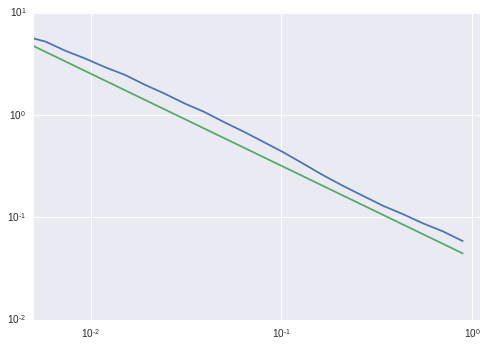

In [49]:
plt.plot(tpoints,wt)
plt.plot(tpoints, 0.04*np.power(tpoints, -0.9))
#plt.yscale('log')
plt.loglog()
plt.xlim([5e-3, 1.1])
#plt.ylim([1e-4, 2.0])

In [50]:
tpoints

array([ 0.00454266,  0.00577522,  0.00734221,  0.00933437,  0.01186706,
        0.01508695,  0.01918049,  0.02438474,  0.03100104,  0.03941255,
        0.05010636,  0.06370171,  0.08098589,  0.10295978,  0.13089585,
        0.16641181,  0.2115643 ,  0.26896803,  0.34194709,  0.43472756,
        0.55268215,  0.70264134,  0.89328895])

(0.01, 1.0)

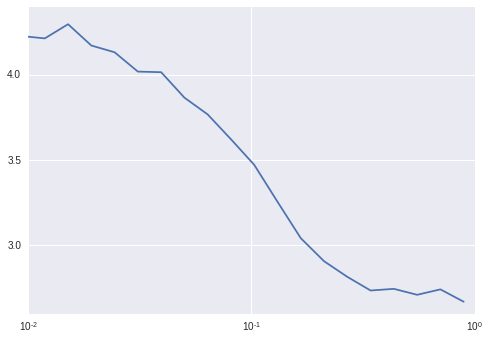

In [51]:
plt.plot(tpoints,wt/(0.02*np.power(tpoints,-0.8)))
plt.xscale('log')
#plt.loglog()
plt.xlim([1e-2, 1.0])
#plt.ylim([1e-4, 2.0])

In [52]:
zbin = 1
redmagic_wt = np.loadtxt('/u/ki/swmclau2/Git/pearce/bin/mcmc/buzzard2_wt_%d%d.npy'%(zbin, zbin))
redmagic_nd = np.loadtxt('/u/ki/swmclau2/Git/pearce/bin/mcmc/buzzard2_nd_%d%d.npy'%(zbin, zbin))

In [53]:
print cat.calc_analytic_nd()

0.0133511571575


In [54]:
redmagic_wt.shape, tpoints.shape

((20,), (23,))

In [55]:
from halotools.mock_observables import *  # i'm importing so much this is just easier

pos = np.vstack([cat.model.mock.galaxy_table[c] for c in ['x', 'y', 'z']]).T
vels = np.vstack([cat.model.mock.galaxy_table[c] for c in ['vx', 'vy', 'vz']]).T

# TODO is the model cosmo same as the one attached to the cat?
ra, dec, z = mock_survey.ra_dec_z(pos * cat.h, vels, cosmo=cat.cosmology)
ang_pos = np.vstack((np.degrees(ra), np.degrees(dec))).T
ra = np.degrees(ra)
dec = np.degrees(dec)


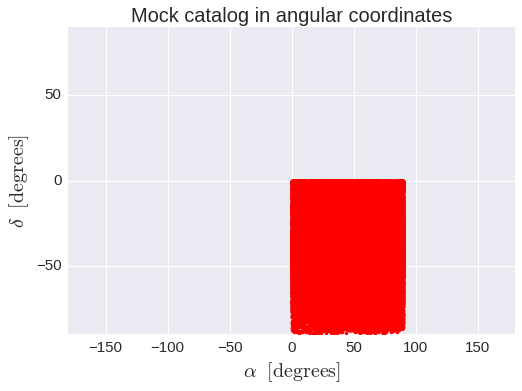

In [56]:
plt.plot(ra,dec,'.',color='red')
plt.xlim([-180,180])
plt.ylim([-90,90])
plt.ylabel(r'$\delta$  $[{\rm degrees}]$', fontsize=20)
plt.xlabel(r'$\alpha$  $[{\rm degrees}]$', fontsize=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Mock catalog in angular coordinates', fontsize=20)

In [57]:
n_rands = 5
rand_pos = np.random.random((pos.shape[0] * n_rands, 3)) * cat.Lbox#*cat.h
rand_vels = np.zeros((pos.shape[0] * n_rands, 3))

rand_ra, rand_dec, rand_z = mock_survey.ra_dec_z(rand_pos * cat.h, rand_vels, cosmo=cat.cosmology)
rand_ang_pos = np.vstack((np.degrees(rand_ra), np.degrees(rand_dec))).T

In [58]:
wt_all = angular_tpcf(ang_pos, theta_bins,randoms = rand_ang_pos, num_threads=1)

In [59]:
print wt_all
print wt

[ 5.81425342  5.09297521  4.2851308   3.56366804  2.9475765   2.46955568
  1.97670519  1.61860658  1.29655023  1.0663      0.84566017  0.68036138
  0.54170023  0.42707402  0.33073183  0.25461827  0.20137233  0.16082336
  0.12827628  0.1062553   0.08645448  0.07221234  0.0580588 ]
[ 5.8736588   5.20685301  4.23693648  3.55659572  2.92553861  2.4619595
  1.97268174  1.61254824  1.29426524  1.0671777   0.8479481   0.68199511
  0.54106059  0.42802426  0.33119375  0.25540501  0.20141353  0.16097318
  0.12906337  0.10689062  0.08708983  0.07271708  0.05842538]


In [60]:
wt_all

array([ 5.81425342,  5.09297521,  4.2851308 ,  3.56366804,  2.9475765 ,
        2.46955568,  1.97670519,  1.61860658,  1.29655023,  1.0663    ,
        0.84566017,  0.68036138,  0.54170023,  0.42707402,  0.33073183,
        0.25461827,  0.20137233,  0.16082336,  0.12827628,  0.1062553 ,
        0.08645448,  0.07221234,  0.0580588 ])

In [61]:
theta_bins

array([ 0.004     ,  0.00508532,  0.00646512,  0.0082193 ,  0.01044944,
        0.01328469,  0.01688922,  0.02147177,  0.0272977 ,  0.03470438,
        0.04412072,  0.05609199,  0.07131143,  0.09066035,  0.11525921,
        0.14653248,  0.18629113,  0.23683748,  0.30109857,  0.38279562,
        0.48665951,  0.61870479,  0.7865779 ,  1.        ])

In [62]:
pos

array([[  23.89081001,  178.35194397,   71.8972168 ],
       [  54.23852158,  147.21220398,   83.84456635],
       [  17.5035305 ,  142.14735413,  121.23322296],
       ..., 
       [ 257.43991089,  336.55627441,  210.12097168],
       [ 266.16067505,  357.0647583 ,  265.43148804],
       [ 247.02096558,  364.51696777,  202.99438477]], dtype=float32)

In [63]:
cat.cosmology

LambdaCDM(H0=70 km / (Mpc s), Om0=0.286, Ode0=0.714, Tcmb0=2.725 K, Neff=3.04, m_nu=[ 0.  0.  0.] eV, Ob0=None)

In [64]:
pos = np.vstack([cat.model.mock.galaxy_table[c] for c in ['x', 'y', 'z']]).T

coords = pos- cat.model.mock.Lbox/2.0

ra_init, dec_init, z = mock_survey.ra_dec_z(coords*cat.h, vels, cosmo=cat.cosmology)

#keep a complete spherical volume
r = np.sqrt(coords[:,0]**2 + coords[:,1]**2 + coords[:,2]**2)
keep = r<cat.Lbox/2.0

ra = np.degrees(ra_init[keep])
dec = np.degrees(dec_init[keep])

angular_coords = np.vstack((ra,dec)).T

In [65]:
w_theta = angular_tpcf(angular_coords, theta_bins, num_threads='max')

In [66]:
theta_bins

array([ 0.004     ,  0.00508532,  0.00646512,  0.0082193 ,  0.01044944,
        0.01328469,  0.01688922,  0.02147177,  0.0272977 ,  0.03470438,
        0.04412072,  0.05609199,  0.07131143,  0.09066035,  0.11525921,
        0.14653248,  0.18629113,  0.23683748,  0.30109857,  0.38279562,
        0.48665951,  0.61870479,  0.7865779 ,  1.        ])

In [67]:
w_theta

array([ 30.5139564 ,  26.62193393,  21.52749364,  19.41205031,
        17.29635559,  13.93466439,  11.68176868,   9.87458338,
         7.91192395,   6.62138671,   5.42748788,   4.45971481,
         3.70787344,   3.00121293,   2.47117209,   1.95841513,
         1.56030096,   1.2190271 ,   0.9375459 ,   0.73474283,
         0.57897129,   0.45481256,   0.35981626])

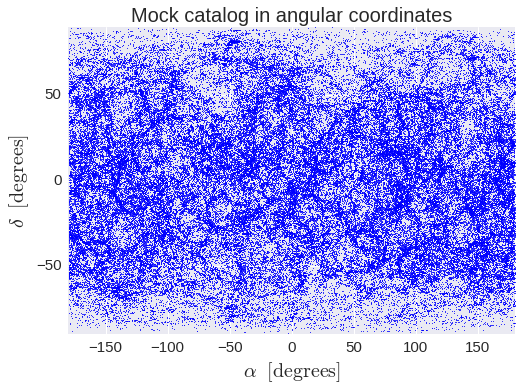

In [68]:
plt.plot(ra,dec,'.',color='blue', ms = 2.0)
plt.xlim([-180,180])
plt.ylim([-90,90])
plt.ylabel(r'$\delta$  $[{\rm degrees}]$', fontsize=20)
plt.xlabel(r'$\alpha$  $[{\rm degrees}]$', fontsize=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Mock catalog in angular coordinates', fontsize=20)

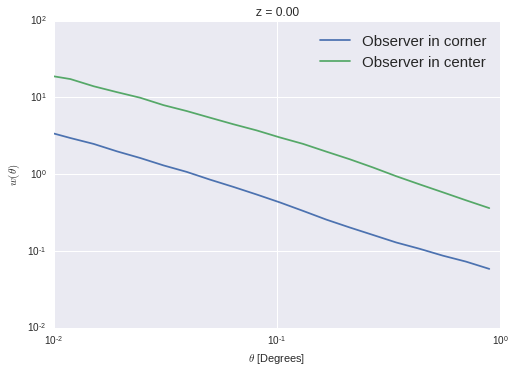

In [74]:
plt.plot(tpoints,wt_all, label = 'Observer in corner')
plt.plot(tpoints, w_theta, label = 'Observer in center')
#plt.xscale('log')
plt.loglog()
plt.xlim([1e-2, 1.0])
#plt.ylim([1e-4, 2.0])
plt.legend(loc='best', fontsize = 15)
plt.xlabel(r'$\theta$ [Degrees]')
plt.ylabel(r'$w(\theta)$')
plt.title('z = %.2f'%(1.0/a - 1.0))

In [70]:
ra_init, dec_init, z = mock_survey.ra_dec_z(coords*cat.h, vels, cosmo=cat.cosmology)

ra, dec, z = mock_survey.ra_dec_z(pos * cat.h, vels, cosmo=cat.cosmology)
